In [ ]:
#Importación de librerías.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##**Descarga de archivos csv y creación de dataframes pandas.**

In [ ]:
csv_incidencia_delictiva = 'https://repodatos.atdt.gob.mx/api_update/sesnsp/incidencia_delictiva/INM_estatal_jun25.csv'
df_incidencia_delictiva = pd.read_csv(csv_incidencia_delictiva, encoding = 'utf-8')

Genero una visualización de los dataframes con el método head(). También utilizo el método .info() para conocer la cantidad de columnas y su tipo de datos.

In [ ]:
df_incidencia_delictiva.head()

,anio,clave_ent,entidad,bien_juridico_afectado,tipo_delito,subtipo_delito,modalidad,mes,fecha,incidencia_delictiva,entidad_federativa
0,2015,1,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Abril,2015-04-01,22.0,Aguascalientes
1,2015,1,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Agosto,2015-08-01,40.0,Aguascalientes
2,2015,1,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Diciembre,2015-12-01,26.0,Aguascalientes
3,2015,1,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Enero,2015-01-01,41.0,Aguascalientes
4,2015,1,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Febrero,2015-02-01,33.0,Aguascalientes


In [ ]:
df_incidencia_delictiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395136 entries, 0 to 395135
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   anio                    395136 non-null  int64  
 1   clave_ent               395136 non-null  int64  
 2   entidad                 395136 non-null  object 
 3   bien_juridico_afectado  395136 non-null  object 
 4   tipo_delito             395136 non-null  object 
 5   subtipo_delito          395136 non-null  object 
 6   modalidad               395136 non-null  object 
 7   mes                     395136 non-null  object 
 8   fecha                   395136 non-null  object 
 9   incidencia_delictiva    395136 non-null  float64
 10  entidad_federativa      395136 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 33.2+ MB


In [ ]:
df_incidencia_delictiva.isnull().sum()

,0
anio,0
clave_ent,0
entidad,0
bien_juridico_afectado,0
tipo_delito,0
subtipo_delito,0
modalidad,0
mes,0
fecha,0
incidencia_delictiva,0


Se hace una agrupación del dataframe para conocer los tipos de delito por entidad federativa.

In [ ]:
df_incidencia_delictiva.groupby(['entidad', 'bien_juridico_afectado'])['incidencia_delictiva'].sum().reset_index()

,entidad,bien_juridico_afectado,incidencia_delictiva
0,Aguascalientes,El patrimonio,197087.0
1,Aguascalientes,La familia,23604.0
2,Aguascalientes,La libertad y la seguridad sexual,8591.0
3,Aguascalientes,La sociedad,721.0
4,Aguascalientes,La vida y la Integridad corporal,48944.0
...,...,...,...
219,Zacatecas,La libertad y la seguridad sexual,6987.0
220,Zacatecas,La sociedad,447.0
221,Zacatecas,La vida y la Integridad corporal,35850.0
222,Zacatecas,Libertad personal,4748.0


In [ ]:
df_incidencia_delictiva.groupby(['anio', 'mes'])['incidencia_delictiva'].sum() #.size().reset_index(name = 'total')

anio  mes      
2015  Abril        137645.0
      Agosto       139416.0
      Diciembre    130698.0
      Enero        129151.0
      Febrero      130311.0
                     ...   
2025  Enero        162381.0
      Febrero      160097.0
      Junio        168301.0
      Marzo        176116.0
      Mayo         174170.0
Name: incidencia_delictiva, Length: 126, dtype: float64

Se hace una copia del dataframe para no perder los cambios.

In [ ]:
df_id = pd.DataFrame()
df_id = df_incidencia_delictiva.copy(deep = True) #Los cambios en la copia no se refrejaran en el original
df_id.shape

(395136, 11)

Se borran las columnas con datos redundantes.

In [ ]:
df_id.drop(['clave_ent', 'fecha', 'entidad_federativa', ], axis=1, inplace = True)
df_id = df_id.reset_index(drop = True)
df_id.shape

(395136, 8)

In [ ]:
df_id.head()

,anio,entidad,bien_juridico_afectado,tipo_delito,subtipo_delito,modalidad,mes,incidencia_delictiva
0,2015,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Abril,22.0
1,2015,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Agosto,40.0
2,2015,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Diciembre,26.0
3,2015,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Enero,41.0
4,2015,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Febrero,33.0


In [ ]:
df_incidencia_delictiva.groupby(['bien_juridico_afectado'])['incidencia_delictiva'].sum().reset_index()

,bien_juridico_afectado,incidencia_delictiva
0,El patrimonio,9968776.0
1,La familia,2708277.0
2,La libertad y la seguridad sexual,620954.0
3,La sociedad,92985.0
4,La vida y la Integridad corporal,2716132.0
5,Libertad personal,221920.0
6,Otros bienes jurídicos afectados (del fuero co...,4398470.0


In [ ]:
df_incidencia_delictiva.groupby(['tipo_delito'])['incidencia_delictiva'].sum().reset_index()

,tipo_delito,incidencia_delictiva
0,Aborto,7157.0
1,Abuso de confianza,280948.0
2,Abuso sexual,256229.0
3,Acoso sexual,66101.0
4,Allanamiento de morada,141135.0
5,Amenazas,1135665.0
6,Contra el medio ambiente,21504.0
7,Corrupción de menores,24990.0
8,Daño a la propiedad,1405768.0
9,Delitos cometidos por servidores públicos,193683.0


In [ ]:
df_id['subtipo_delito'].value_counts()

,count
subtipo_delito,
Robo de vehículo automotor,24192
Robo de maquinaria,24192
Homicidio culposo,20160
Lesiones culposas,20160
Secuestro,20160
Feminicidio,16128
Lesiones dolosas,16128
Homicidio doloso,16128
Robo de autopartes,8064


In [ ]:
df_id['modalidad'].value_counts()

,count
modalidad,
Con violencia,48384
Sin violencia,48384
No especificado,20160
Con arma blanca,20160
Con arma de fuego,20160
Con otro elemento,20160
En accidente de tránsito,8064
Despojo,4032
Daño a la propiedad,4032


In [ ]:
df_temp = pd.DataFrame()
df_temp = df_id.groupby([df_id['anio'], 'modalidad', 'encoder_modalidad_delito']).size().reset_index(name = 'total')#['fecha'].value_counts().sort_index().reset_index()
df_temp = df_temp.rename(columns={'anio': 'año'})
for a in range(len(df_temp)):
  if df_temp.loc[a, 'año'] == 2024:
    df_temp.loc[a, 'media_dia'] = df_temp.loc[a, 'total'] / 365
  elif df_temp.loc[a, 'año'] % 4 == 0:
    df_temp.loc[a, 'media_dia'] = df_temp.loc[a, 'total'] / 366
  else:
    df_temp.loc[a, 'media_dia'] = df_temp.loc[a, 'total'] / 365

fig = plt.figure()
fig.suptitle('Promedio de delitos por día', fontsize = 20, y = 0.9)
fig.set_size_inches(8, 48)
fig.subplots_adjust(hspace = 0.6, wspace=0.1)

for d, delito in enumerate(encoder_modalidad_delito.classes_):
    ax = fig.add_subplot(58, 1, d+1)
    ymax = np.ceil(df_temp[df_temp['encoder_modalidad_delito'] == d]['media_dia'].max())
    ax.set_ylim(bottom = 0, top = ymax)
    ax.plot(df_temp[df_temp['encoder_modalidad_delito'] == d]['año'], df_temp[df_temp['encoder_modalidad_delito'] == d]['media_dia'], label = d, color = 'r')
    ax.set_title(delito, fontsize = 16)
    ax.set_xlabel('Año', fontsize = 8)
    ax.set_ylabel('Número de delitos', fontsize = 8)
    ax.grid(False)
plt.show()

KeyError: 'encoder_modalidad_delito'

In [ ]:
df=df_incidencia_delictiva.groupby(['anio', 'mes'])['incidencia_delictiva'].sum().reset_index()
df.head()

,anio,mes,incidencia_delictiva
0,2015,Abril,137645.0
1,2015,Agosto,139416.0
2,2015,Diciembre,130698.0
3,2015,Enero,129151.0
4,2015,Febrero,130311.0


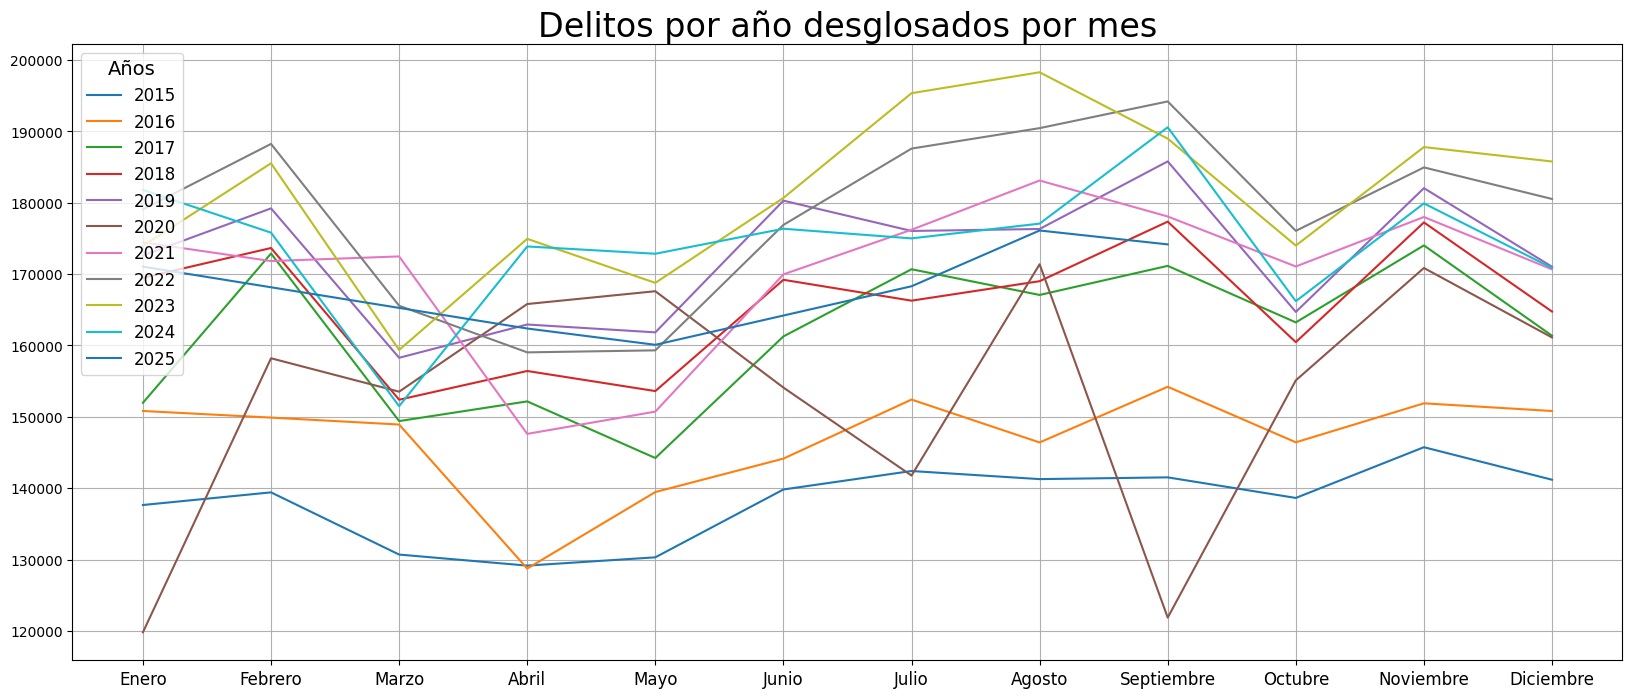

In [ ]:
df = df_id.groupby(['anio', 'mes'])['incidencia_delictiva'].sum().reset_index()
df_temp = pd.DataFrame()

df_temp['Año'] = df['anio']
df_temp['Mes'] = df['mes']
df_temp['Total_delitos'] = df['incidencia_delictiva']
anios = df_temp['Año'].unique()
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

fig, ax = plt.subplots(figsize = (20, 16))
fig.set_size_inches(20, 8)

[ax.plot(df_temp[df_temp['Año'] == a]['Mes'], df_temp[df_temp['Año'] == a]['Total_delitos'], label = a) for a in anios]

ax.grid(True)
ax.set_title('Delitos por año desglosados por mes', fontsize = 24)
ax.set_xticks(range(len(meses)))
ax.set_xticklabels(meses, fontsize = 12)
ax.legend(title = 'Años',  loc = 'upper left', title_fontsize = 14, fontsize = 12)
plt.savefig("del_mun.svg")
plt.show()

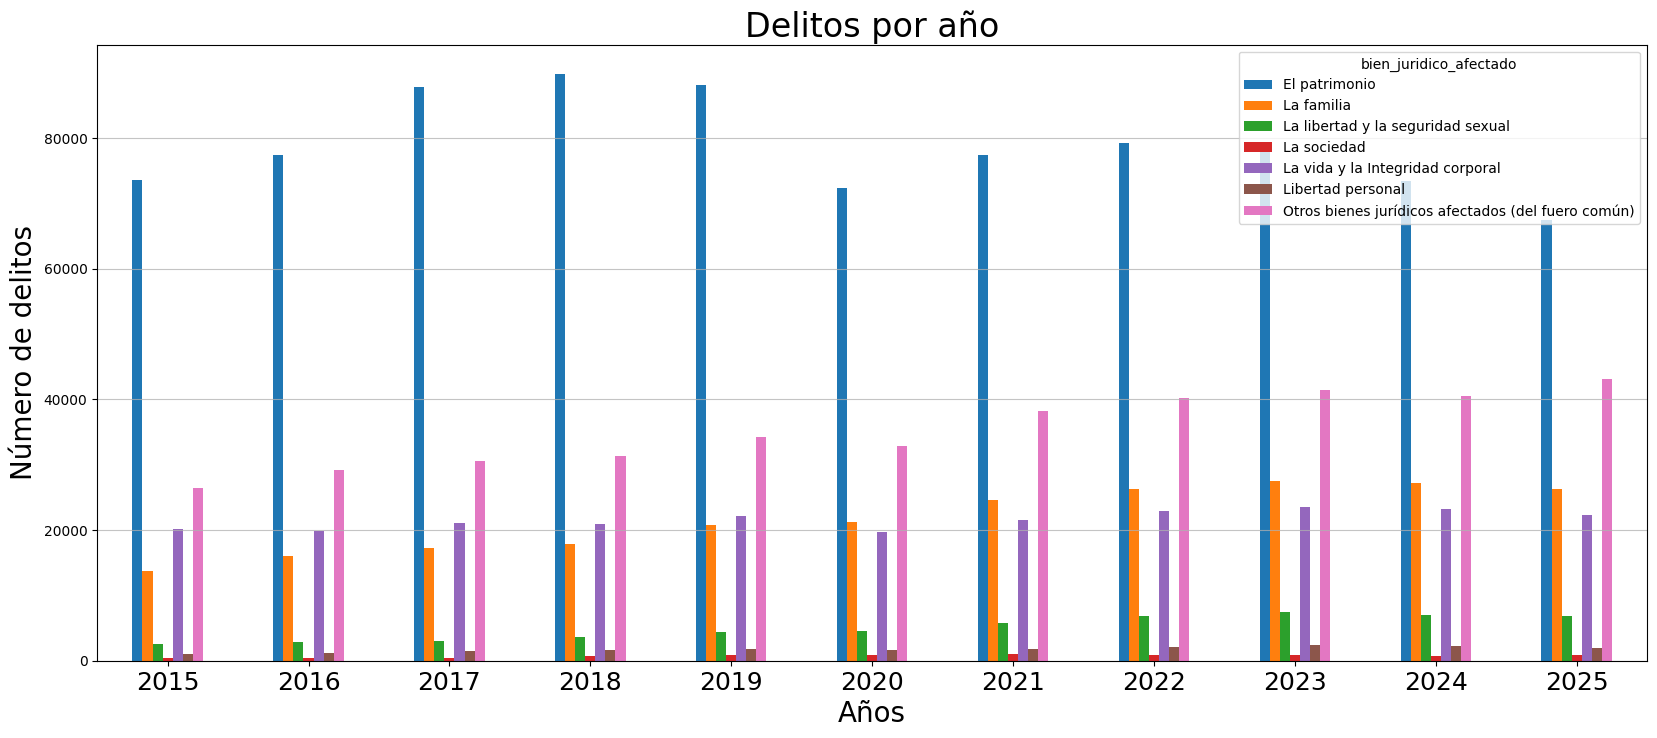

In [ ]:
df_aux = df_id.groupby(['anio', 'mes', 'bien_juridico_afectado'])['incidencia_delictiva'].sum().reset_index()
df_aux["año"] = df_aux['anio']
df_aux.sort_values(by = "año", inplace = True)

df_pivot = pd.pivot_table(
    df_aux,
    values = 'incidencia_delictiva',
    index = 'año',
    columns = 'bien_juridico_afectado'
)

ax = df_pivot.plot(kind="bar")

fig = ax.get_figure()
fig.set_size_inches(20, 8)
ax.set_title('Delitos por año', fontsize = 24)
ax.set_xlabel('Años', fontsize = 20)
ax.tick_params(axis = 'x', labelsize = 18, rotation = 0)
ax.set_ylabel('Número de delitos', fontsize = 20)
ax.grid(visible = True, axis = 'y', alpha = 0.75)

plt.show()

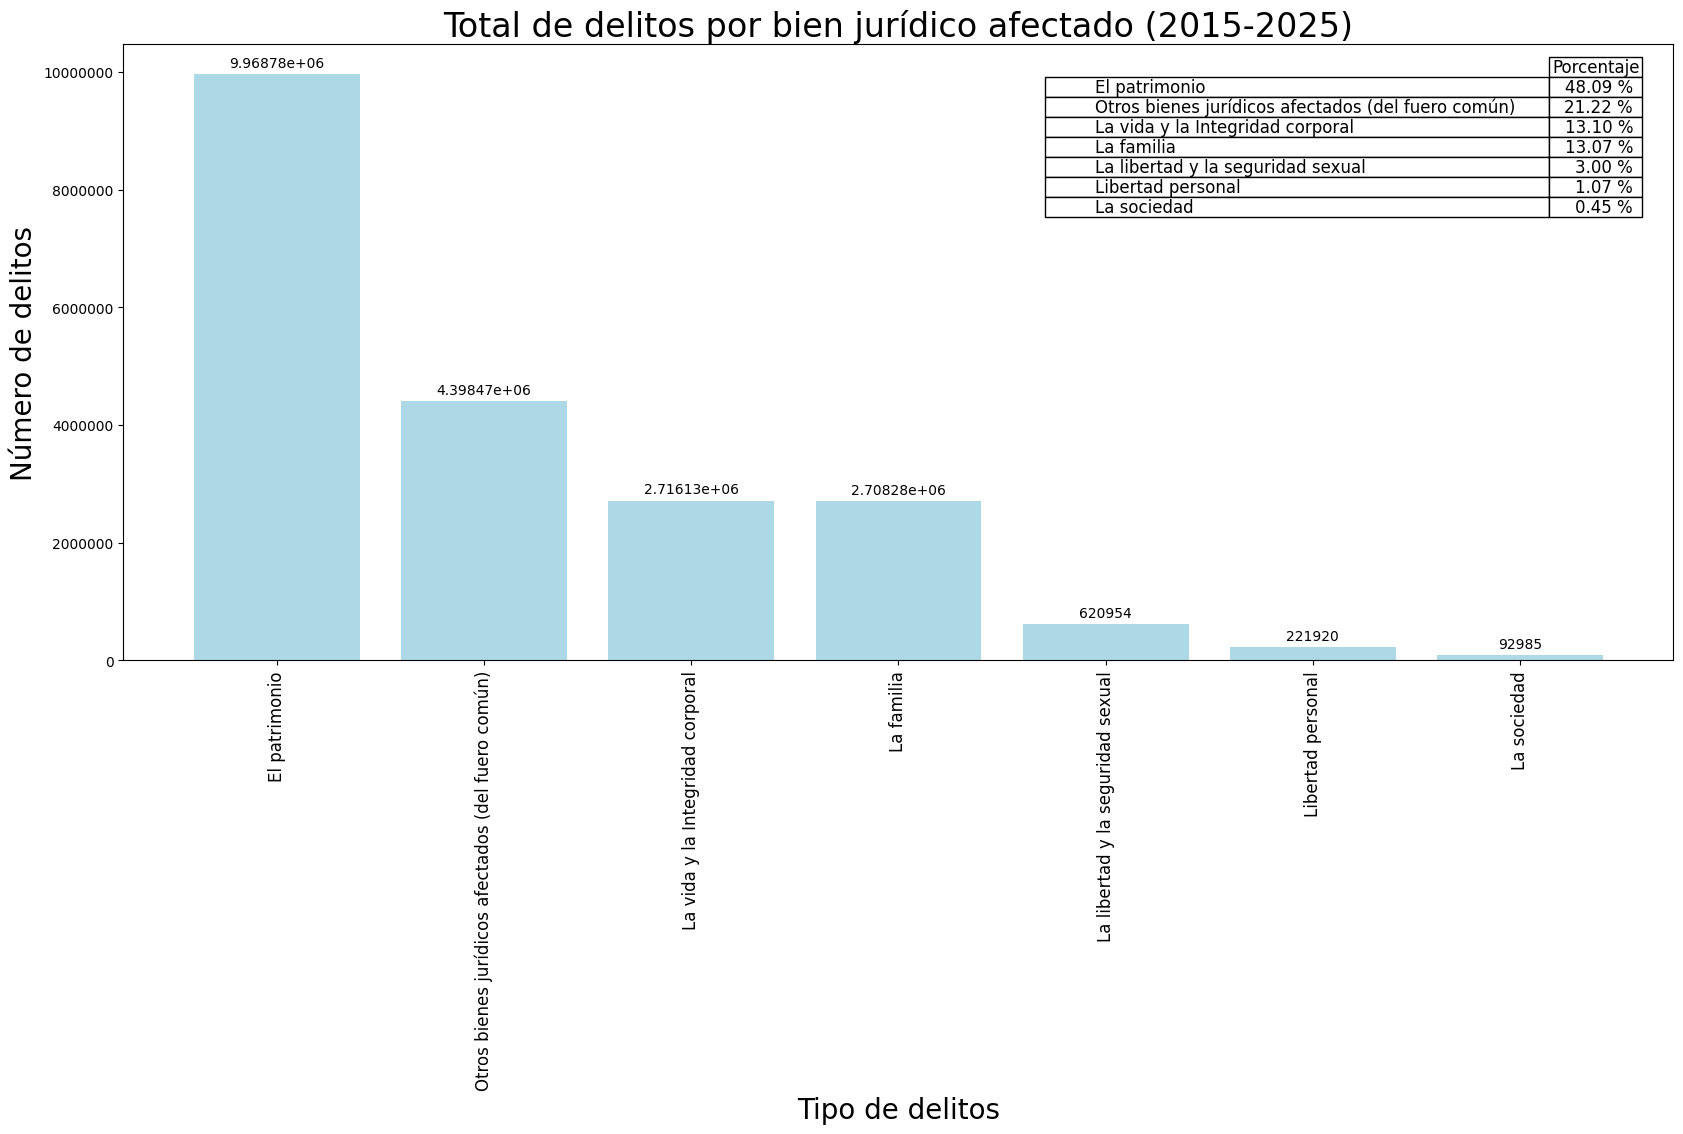

In [ ]:
ser_aux = df_id.groupby('bien_juridico_afectado')['incidencia_delictiva'].sum()
ser_aux.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

bar_container = ax.bar(ser_aux.index, ser_aux, color = 'lightblue')
ax.set_title('Total de delitos por bien jurídico afectado (2015-2025)', fontsize =  24)
ax.set_xlabel('Tipo de delitos', fontsize = 20)
ax.tick_params(axis = 'x', labelsize = 12, rotation = 90)
ax.set_ylabel('Número de delitos', fontsize = 20)
ax.bar_label(bar_container, padding = 3)
#ticks = [1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]
#labels = ["1 000 000", '2 000 000', '3 000 000', '4 000 000', '5 000 000', '6 000 000', '7 000 000', '8 000 000', '9 000 000', '10 000 000']
#plt.yticks(ticks, labels)
ax.ticklabel_format(axis='y', style='plain')
#ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
cell_val = []
for i in range(0, len(ser_aux)):
    cell_val.append([f'{ser_aux.iloc[i] / ser_aux.sum() * 100:1.2f} %'])

table = ax.table(cellText = cell_val,
         colWidths = [0.05],
         colLabels = ['Porcentaje'],
         rowLabels = ser_aux.index,
         #rowColours = bar_colors,
         loc = 'upper right')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2,1.2)
plt.show()

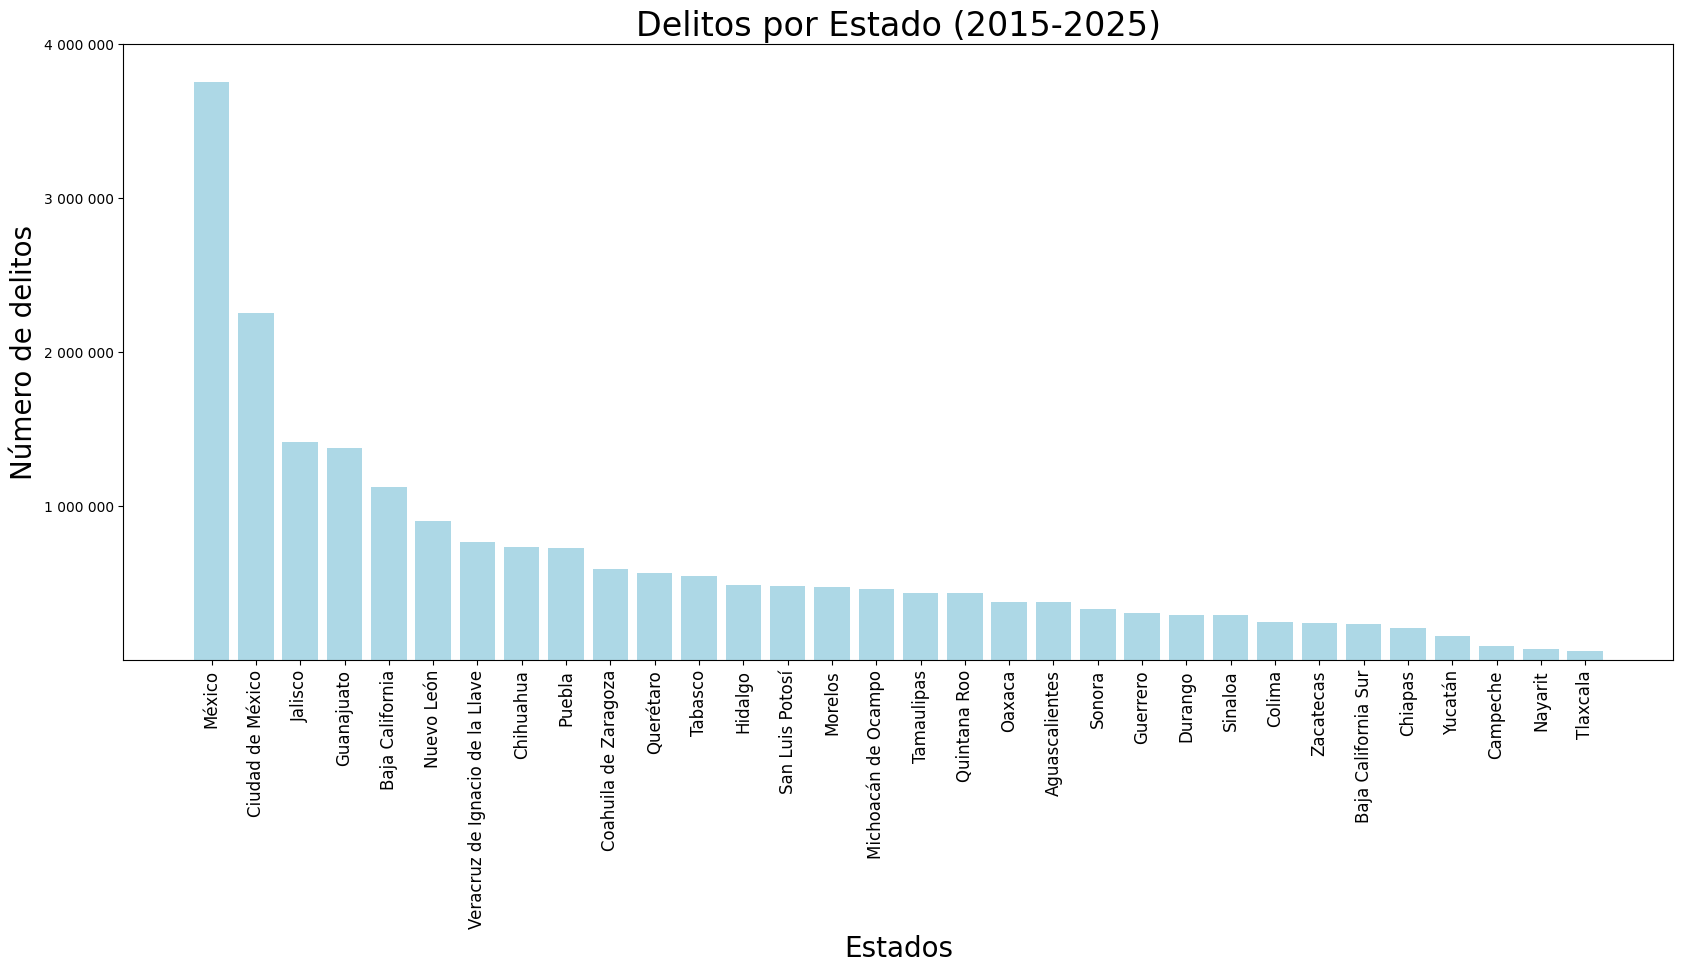

In [ ]:
ser_aux = df_id.groupby('entidad')['incidencia_delictiva'].sum()
ser_aux.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
bar_container = ax.bar(ser_aux.index, ser_aux, color = 'lightblue')
ax.set_title('Delitos por Estado (2015-2025)', fontsize = 24)
ax.set_xlabel('Estados', fontsize = 20)
ax.tick_params(axis = 'x', labelsize = 12, rotation = 90)
ax.set_ylabel('Número de delitos', fontsize = 20)
ticks = [1000000, 2000000, 3000000, 4000000]
labels = ["1 000 000", '2 000 000', '3 000 000', '4 000 000']
plt.yticks(ticks, labels)

plt.show()

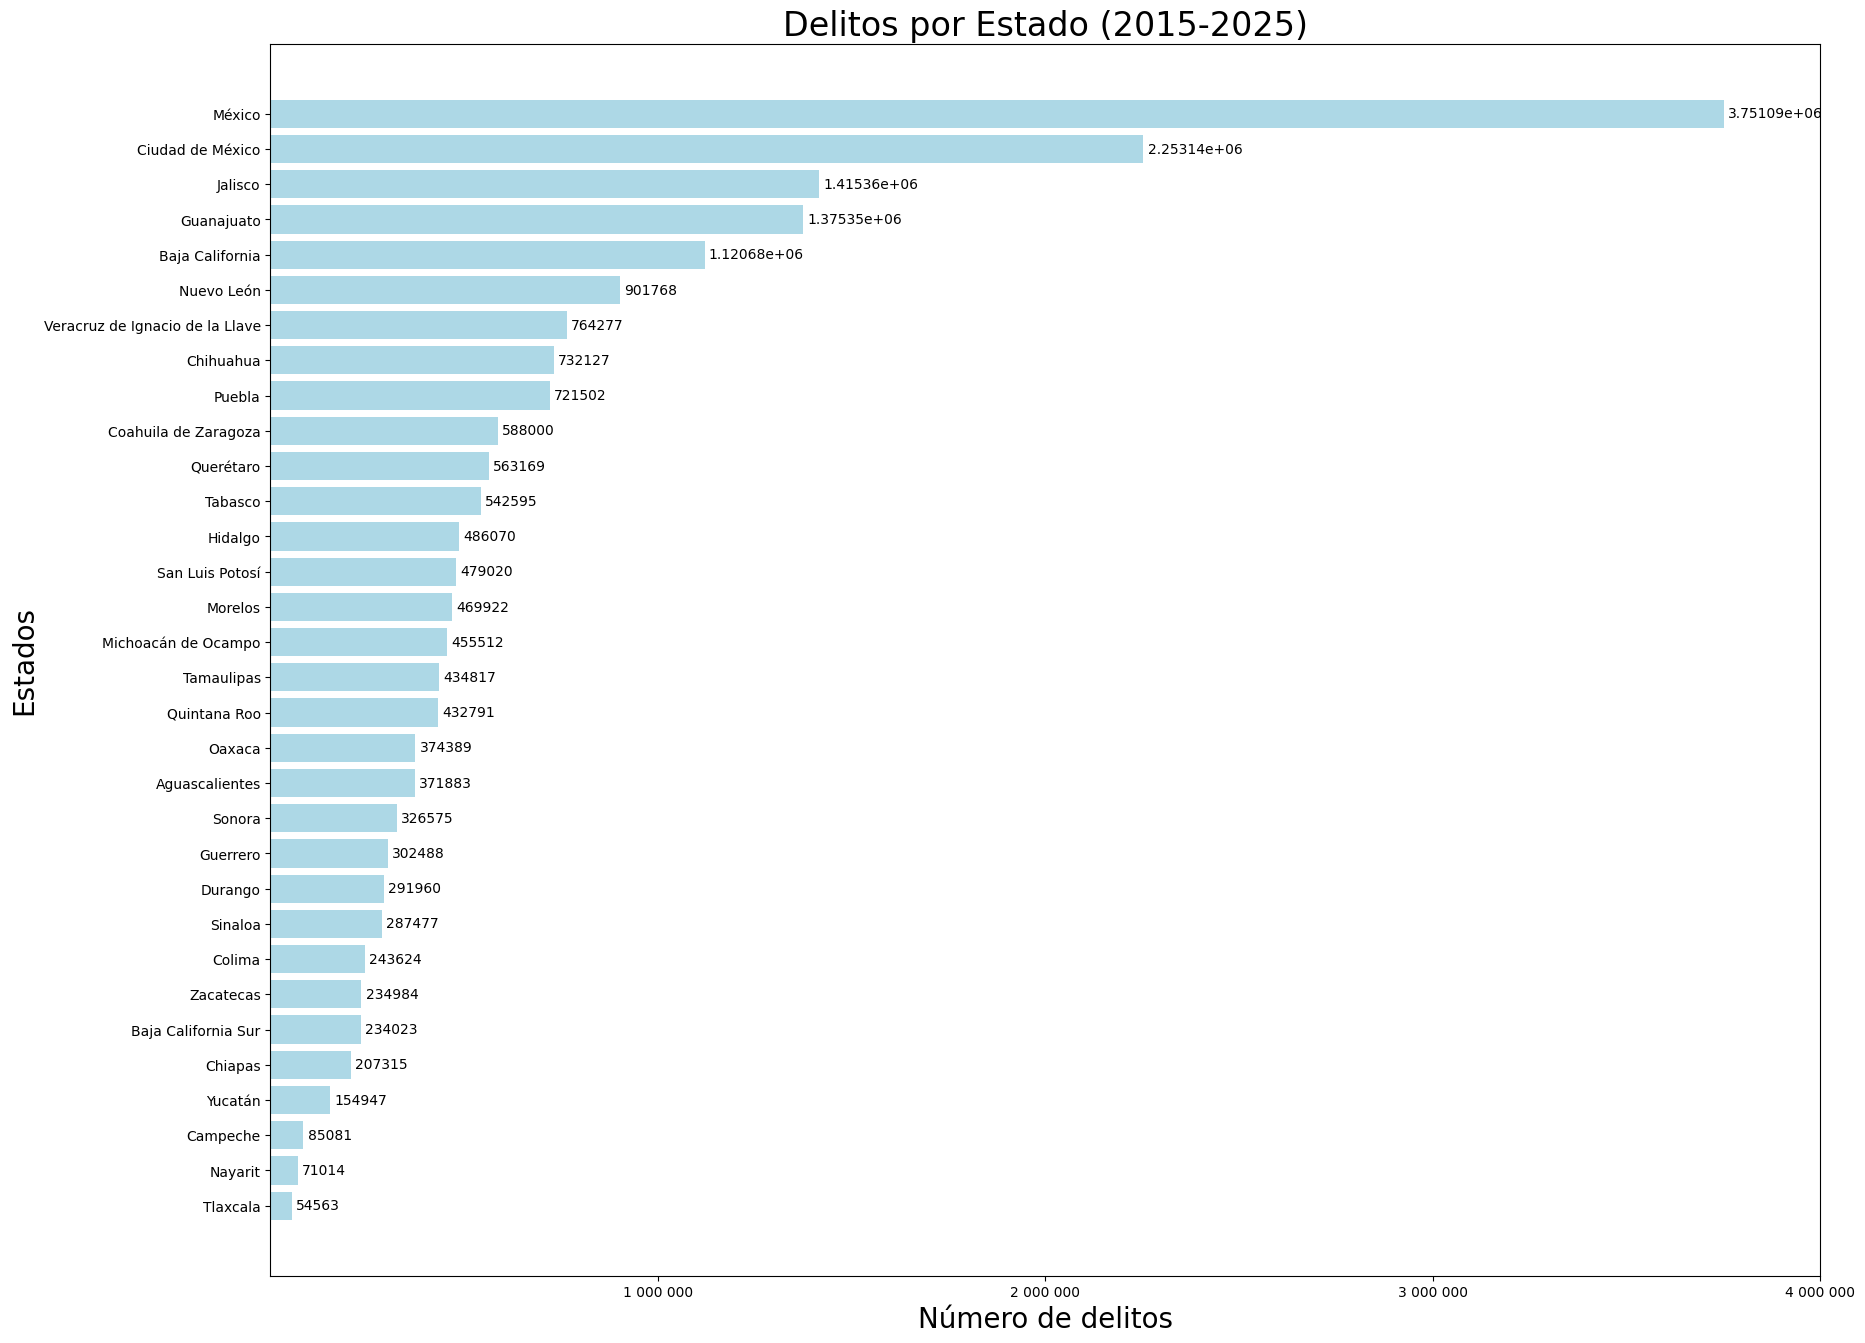

In [ ]:
#pd.options.display.int_format = '{:.2f}'.format
np.set_printoptions(suppress=True)
ser_aux = df_id.groupby('entidad')['incidencia_delictiva'].sum()
ser_aux.sort_values(ascending = True, inplace = True)

fig, ax = plt.subplots()
fig.set_size_inches(20, 16)

bar_container = ax.barh(ser_aux.index, ser_aux, color = 'lightblue')
#ax.ticklabel_format(axis='x', style='plain')
#ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
#plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0)) #axis = 'both'
#plt.ticklabel_format(useOffset=False)
ax.set_title('Delitos por Estado (2015-2025)', fontsize = 24)
ax.set_xlabel('Número de delitos', fontsize = 20)
ax.bar_label(bar_container, padding = 3)
#ax.tick_params(axis = 'x', labelsize = 12, rotation = 90)
ax.set_ylabel('Estados', fontsize = 20)
ticks = [1000000, 2000000, 3000000, 4000000]
labels = ["1 000 000", '2 000 000', '3 000 000', '4 000 000']
plt.xticks(ticks, labels)
# cell_val = []
# for i in range(0, len(ser_aux)):
#     cell_val.append([f'{ser_aux.iloc[i] / ser_aux.sum() * 100:1.2f} %'])
plt.show()

In [ ]:
ser_aux

,incidencia_delictiva
entidad,
Tlaxcala,54563
Nayarit,71014
Campeche,85081
Yucatán,154947
Chiapas,207315
Baja California Sur,234023
Zacatecas,234984
Colima,243624
Sinaloa,287477


In [ ]:
dfa = (df_id[(df_id['bien_juridico_afectado'] == 'El patrimonio')])
dfa.groupby([dfa['anio'], dfa['mes'], dfa['tipo_delito']])['incidencia_delictiva'].sum().reset_index()


In [ ]:
df_aux = (df_id[(df_id['bien_juridico_afectado'] == 'El patrimonio')])
df_aux = df_aux.groupby(['anio', 'mes', 'tipo_delito'])['incidencia_delictiva'].sum().reset_index()
df_aux["año"] = df_aux['anio']
df_aux.sort_values(by = "año", inplace = True)

df_pivot = pd.pivot_table(
    df_aux,
    values = 'incidencia_delictiva',
    index = 'año',
    columns = 'tipo_delito'
)

ax = df_pivot.plot(kind="bar")

fig = ax.get_figure()
fig.set_size_inches(20, 8)
ax.set_title('Delitos por año', fontsize = 24)
ax.set_xlabel('Años', fontsize = 20)
ax.tick_params(axis = 'x', labelsize = 18, rotation = 0)
ax.set_ylabel('Número de delitos', fontsize = 20)
ax.grid(visible = True, axis = 'y', alpha = 0.75)

plt.show()

In [ ]:
bien_afectado = df_id['bien_juridico_afectado'].unique()
for bien in bien_afectado:

    df_aux = (df_id[(df_id['bien_juridico_afectado'] == bien)])
    df_aux = df_aux.groupby(['anio', 'mes', 'tipo_delito'])['incidencia_delictiva'].sum().reset_index()
    df_aux["año"] = df_aux['anio']
    df_aux.sort_values(by = "año", inplace = True)

    df_pivot = pd.pivot_table(
        df_aux,
        values = 'incidencia_delictiva',
        index = 'año',
        columns = 'tipo_delito'
    )

    ax = df_pivot.plot(kind="bar")

    fig = ax.get_figure()
    fig.set_size_inches(20, 8)
    ax.set_title(f'Delitos por año ({bien})', fontsize = 24)
    ax.set_xlabel('Años', fontsize = 20)
    ax.tick_params(axis = 'x', labelsize = 18, rotation = 0)
    ax.set_ylabel('Número de delitos', fontsize = 20)
    ax.grid(visible = True, axis = 'y', alpha = 0.75)

    plt.show()

In [ ]:
bien_afectado = df_id['bien_juridico_afectado'].unique()
for bien in bien_afectado:
    df_aux = (df_id[(df_id['bien_juridico_afectado'] == bien)])

    ser_aux = df_aux.groupby('tipo_delito')['incidencia_delictiva'].sum()
    ser_aux.sort_values(ascending = False, inplace = True)

    fig, ax = plt.subplots()
    fig.set_size_inches(20, 8)

    bar_container = ax.bar(ser_aux.index, ser_aux, color = 'lightblue')
    ax.set_title(f'Total de delitos por {bien} (2015-2025)', fontsize =  24)
    ax.set_xlabel('Tipo de delitos', fontsize = 20)
    ax.tick_params(axis = 'x', labelsize = 12, rotation = 90)
    ax.set_ylabel('Número de delitos', fontsize = 20)
    ax.bar_label(bar_container, padding = 3)
    # ticks = [1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]
    # labels = ["1 000 000", '2 000 000', '3 000 000', '4 000 000', '5 000 000', '6 000 000', '7 000 000', '8 000 000', '9 000 000', '10 000 000']
    # plt.yticks(ticks, labels)
    cell_val = []
    for i in range(0, len(ser_aux)):
        cell_val.append([f'{ser_aux.iloc[i] / ser_aux.sum() * 100:1.2f} %'])

    table = ax.table(cellText = cell_val,
         colWidths = [0.05],
         colLabels = ['Porcentaje'],
         rowLabels = ser_aux.index,
         #rowColours = bar_colors,
         loc = 'upper right')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2,1.2)
    plt.show()

In [ ]:
# Delito con su código numérico.
encoder_delito = LabelEncoder()
df_id['encoder_delito'] = encoder_delito.fit_transform(df_id['bien_juridico_afectado'])
for i, delito in enumerate(encoder_delito.classes_):
    print(str(i) + ' ' + delito )

In [ ]:
bien_afectado = df_id['bien_juridico_afectado'].unique()
for bien in bien_afectado:
  print(bien)

In [ ]:
df_aux = (df_id[(df_id['bien_juridico_afectado'] == 'El patrimonio')])
df_aux = df_aux.groupby(['anio', 'mes', 'tipo_delito'])['incidencia_delictiva'].sum().reset_index()
df_aux['tipo_delito'].unique()